## <span style="color:navy"> Esercitazione 12</span>

L'obiettivo dell'esercizio 12 è utilizzare modelli di reti neurali profonde, implementati tramite il pacchetto Python **Keras**, per riconoscere e distinguere le dieci cifre scritte a mano (da 0 a 9).

Il dataset MNIST contiene un totale di 70.000 immagini di cifre scritte a mano. Ogni immagine è rappresentata come una griglia di 28×28 pixel in scala di grigi. Ogni pixel può assumere 256 livelli di intensità, da 0 (bianco) a 255 (nero), e pertanto ogni immagine può essere vista come un array di interi compresi tra 0 e 255.

Poiché ci sono 10 categorie (una per ogni cifra), il problema può essere formalmente considerato come un tipico compito di classificazione.


### <span style="color:teal"> Esercizio 12.1</span>

In questo esercizio ho allenato e ottimizzato una rete neurale profonda (Deep Neural Network - DNN) per riconoscere cifre scritte a mano, utilizzando il dataset MNIST.

Iniziamo importando i dati dal MNIST e preparandoli per l'addestramento del modello.

In [34]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed, 
tf.random.set_seed(seed)

In [35]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [36]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols) #metto i miei 28X28 elementi (tutti i pixel) in un vettore
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats (li trasformo in float, per ora erano interi)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1] (normalizzo i dati)
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In aula, ho provato a modificare un po' la DNN fornita dalla consegna, ho constatato che la miglior combinazione è quella con activation ReLU e ottimizzatore Adam(), questo script allena il modello per qualche epoca per mostrarlo:


 Training con ottimizzatore: SGD


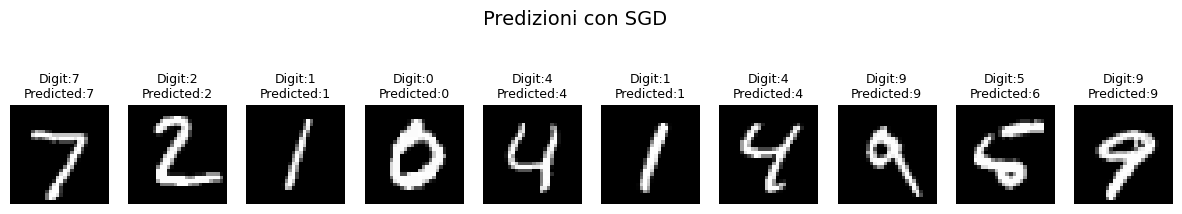


 Training con ottimizzatore: Adam


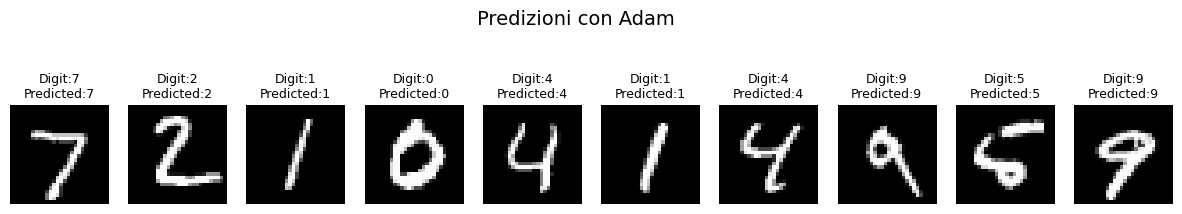


 Training con ottimizzatore: RMSprop


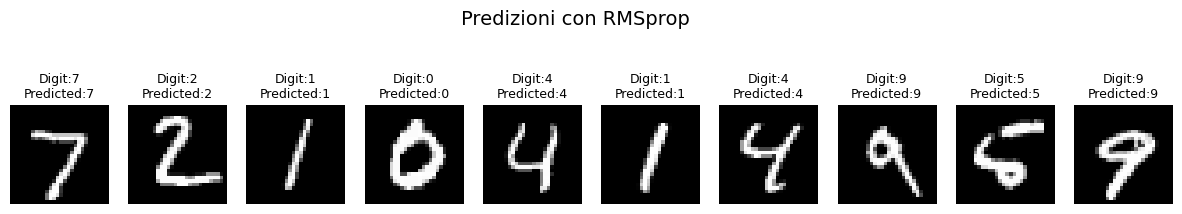


 Training con ottimizzatore: Adagrad


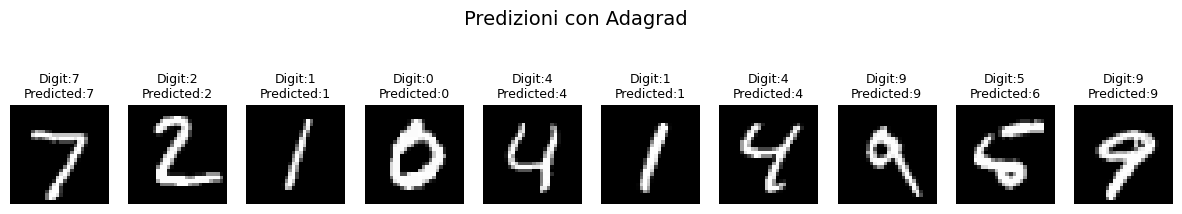

In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import matplotlib.pyplot as plt
import numpy as np

# Imposta il seed per riproducibilità
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)


# Salva una versione flat e una con canale per valutazione grafica
X_test_flat = X_test.reshape(X_test.shape[0], img_rows * img_cols)
X_test_img = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# Funzione per creare il modello
def create_DNN():
    model = Sequential()
    model.add(Dense(400, input_shape=(img_rows * img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parametri di training
batch_size = 32
epochs = 10

# Ottimizzatori da testare
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad()
}

# Dizionario per salvare gli storici
histories = {}

# Ciclo su ciascun ottimizzatore
for name, opt in optimizers.items():
    print(f"\n Training con ottimizzatore: {name}")
    
    model = create_DNN()
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        shuffle=True,
                        verbose=0,  # 🔇 Silenzia l'output per ogni epoca
                        validation_data=(X_test, Y_test))
    
    histories[name] = history
    
    # 📊 Predizioni sul test set (flat)
    predictions = model.predict(X_test_flat, verbose=0)
    
    # 📸 Visualizza i primi 10 esempi
    plt.figure(figsize=(15, 3))
    for i in range(10):
        ax = plt.subplot(1, 10, i + 1)
        plt.imshow(X_test_img[i, :, :, 0], cmap='gray')
        true_label = np.argmax(Y_test[i])
        predicted_label = np.argmax(predictions[i])
        plt.title(f"Digit:{true_label}\nPredicted:{predicted_label}", fontsize=9)
        plt.axis('off')
    plt.suptitle(f" Predizioni con {name}", fontsize=14)
    plt.show()


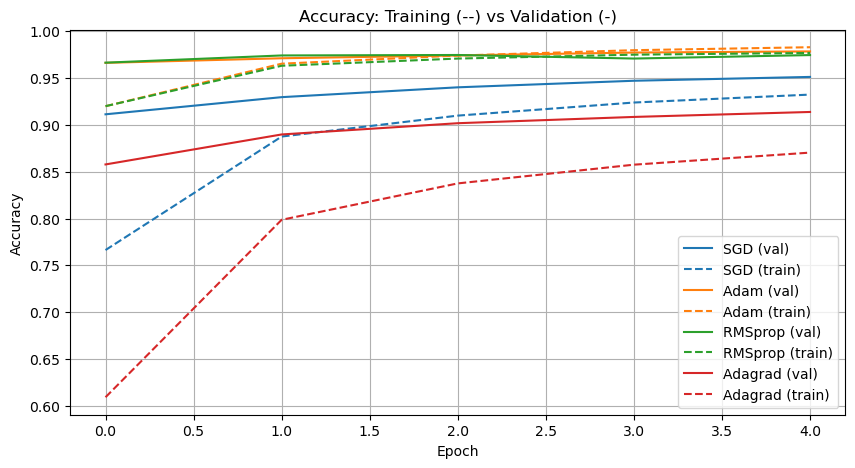

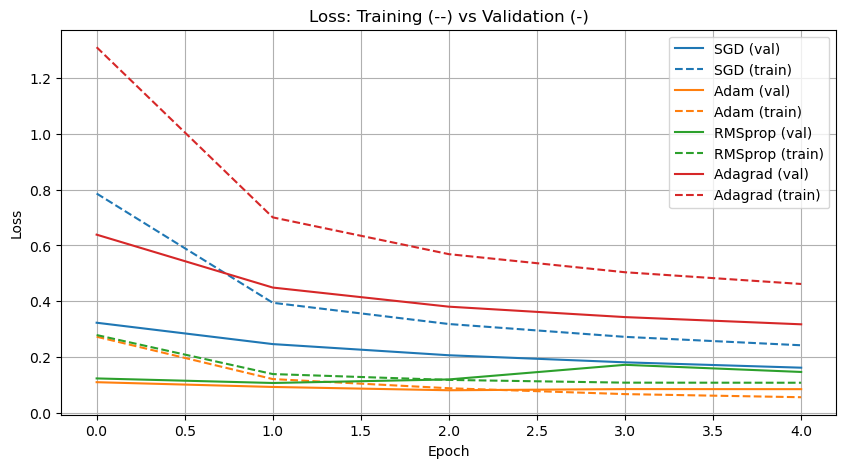

In [16]:
# 📈 Accuracy
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    # Traccia validazione (linea continua)
    val_line, = plt.plot(history.history['val_accuracy'], label=f'{name} (val)', linestyle='-')
    # Traccia training (linea tratteggiata, stesso colore)
    plt.plot(history.history['accuracy'], label=f'{name} (train)', linestyle='--', color=val_line.get_color())

plt.title('Accuracy: Training (--) vs Validation (-)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 📉 Loss
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    val_line, = plt.plot(history.history['val_loss'], label=f'{name} (val)', linestyle='-')
    plt.plot(history.history['loss'], label=f'{name} (train)', linestyle='--', color=val_line.get_color())

plt.title('Loss: Training (--) vs Validation (-)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


I risultati del test sul riconoscimento di cifre mai viste e dall'andamento di loss e accuratezza in funzione delle epoche per i vari ottimizzatori confermano che il miglior ottimizzatore per il nostro scopo è Adam.

### <span style="color:teal"> Esercizio 12.2</span>

Per migliorare l'accuratezza del riconoscimento delle cifre scritte a mano è stata implementata una rete neurale convoluzionale (CNN), più adatta ad elaborare immagini perché sfrutta l'invarianza traslazionale che le caratterizza.

Dobbiamo innanzitutto modificare la forma dei dati di input:

In [18]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


A questo punto possiamo costruire il nostro modello di rete neurale convoluzionale facendo uso dei seguenti elementi:

#### Conv2D

Il layer Conv2D applica un insieme di filtri bidimensionali all’immagine in input per estrarre automaticamente caratteristiche locali come bordi, angoli o texture. Ogni filtro è una piccola matrice che scorre sulla superficie dell'immagine e genera una nuova rappresentazione (feature map) evidenziando strutture specifiche. I filtri non sono predefiniti: vengono appresi durante l'addestramento del modello in modo da ottimizzare la capacità di riconoscere schemi rilevanti.

#### AveragePooling2D

AveragePooling2D è un layer che riduce la dimensione spaziale (larghezza e altezza) delle feature map ottenute dalla convoluzione, mantenendo le informazioni più significative. Funziona selezionando il valore medio in finestre locali della mappa. Questo processo ha due vantaggi principali:
- Riduce il numero di parametri e la complessità computazionale.
- Rende la rete più robusta a piccoli spostamenti spaziali (invarianza traslazionale).

#### Dropout

Dropout è una tecnica di regolarizzazione che aiuta a prevenire l'overfitting. Durante l'addestramento, spegne casualmente una percentuale di neuroni, impedendo alla rete di dipendere troppo da specifici percorsi interni e favorendo una maggiore generalizzazione. Viene attivato solo in fase di training.

#### Flatten

Il layer Flatten ha il compito di trasformare un tensore multidimensionale (come quelli prodotti da Conv2D e MaxPooling2D) in un vettore monodimensionale. Questa operazione è necessaria per collegare la parte convoluzionale della rete con i layer densi (fully connected), che lavorano solo su input 1D.


In [1]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    return model

In [22]:
# training parameters
batch_size = 32
epochs = 60 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history_CNN=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - acc: 0.6354 - loss: 1.0713 - val_acc: 0.9566 - val_loss: 0.1520
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.8779 - loss: 0.3926 - val_acc: 0.9697 - val_loss: 0.0973
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - acc: 0.9059 - loss: 0.3117 - val_acc: 0.9776 - val_loss: 0.0727
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.9244 - loss: 0.2551 - val_acc: 0.9804 - val_loss: 0.0635
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - acc: 0.9307 - loss: 0.2305 - val_acc: 0.9846 - val_loss: 0.0491
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - acc: 0.9365 - loss: 0.2105 - val_acc: 0.9841 - val_loss: 0.0470
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - acc: 0.9405 - loss: 0.1973 - val_acc: 0.9864 - val_loss: 0.0454
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.9404 - loss: 0.1933 - val_acc: 0.9873 - val_loss: 0.0388
Epoch 9/60
1875/1875 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9899 - loss: 0.0301

Test loss: 0.022308582440018654
Test accuracy: 0.9926999807357788


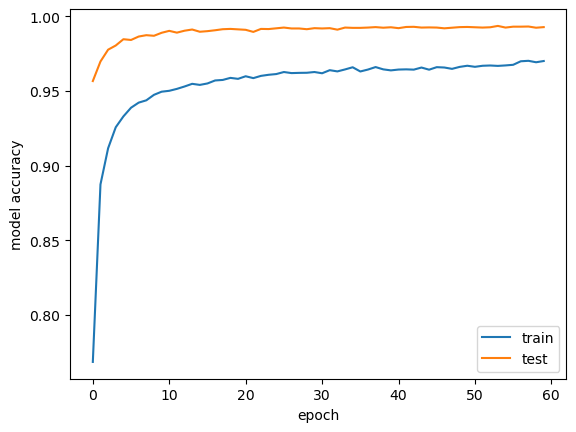

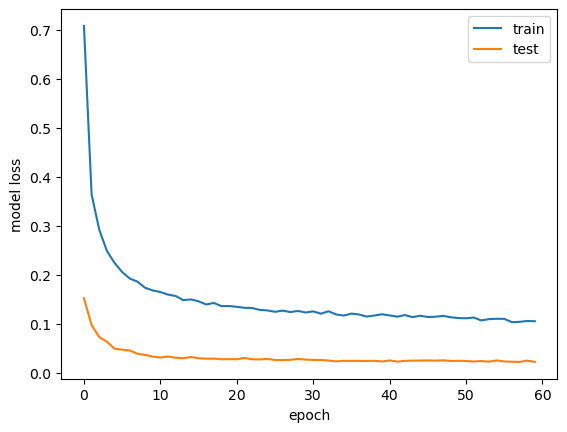

In [23]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history_CNN.history['acc'])
plt.plot(history_CNN.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### <span style="color:teal"> Esercizio 12.3</span>

Ho testato la rete neurale convoluzionale allenata nell'esercizio precedente su un set di cifre scritte a mano da me.

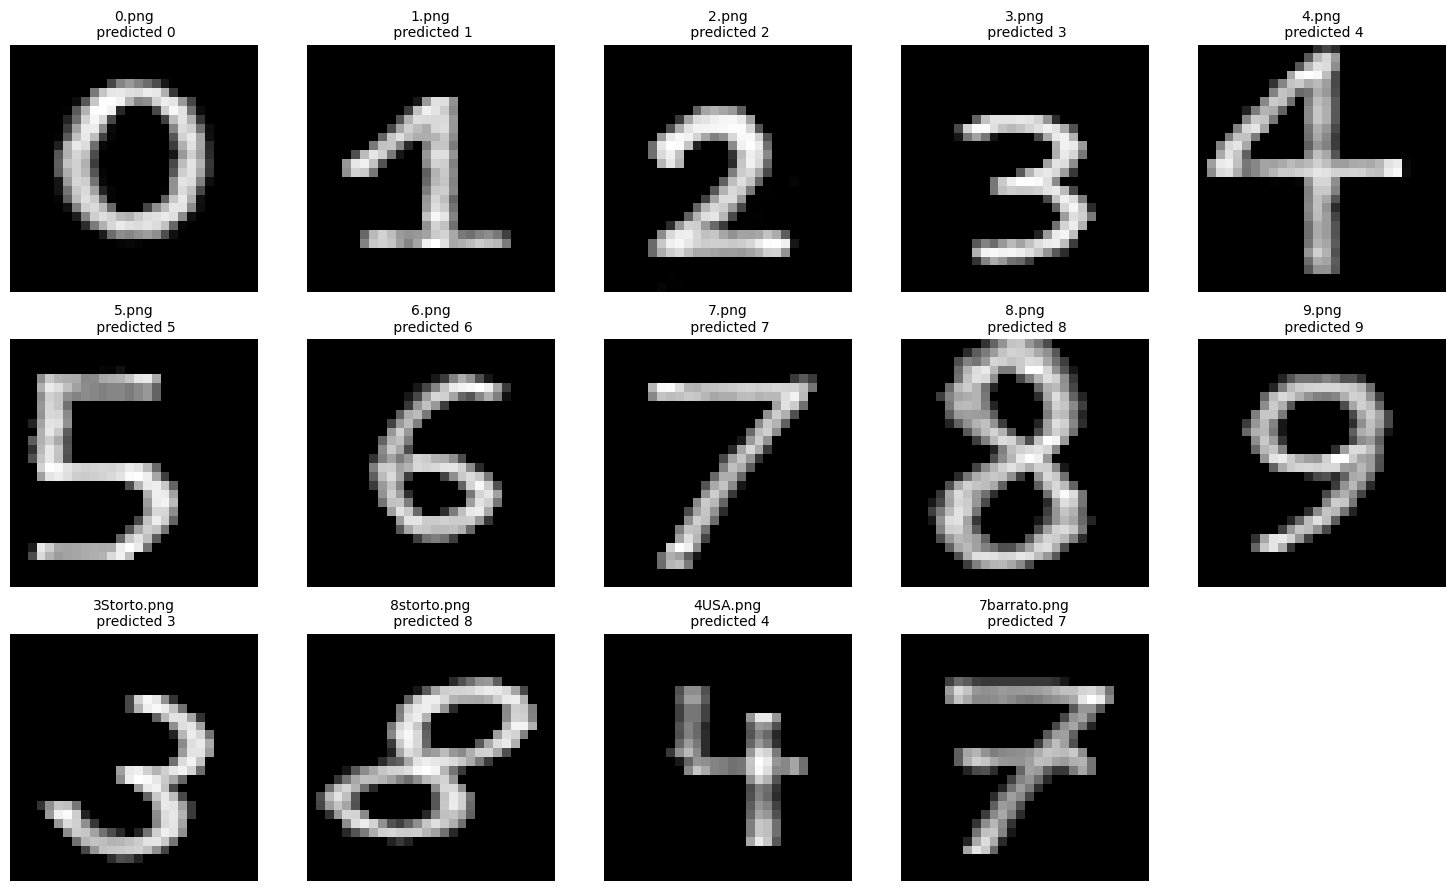

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# INSERISCI QUI I NOMI DEI FILE CHE VUOI TESTARE
digit_filenames = [
    "0.png", "1.png", "2.png", "3.png", "4.png", 
    "5.png", "6.png", "7.png", "8.png", "9.png", 
    "3Storto.png", "8storto.png", "4USA.png", "7barrato.png"
]

cols = 5  # numero di colonne nel layout delle immagini
rows = (len(digit_filenames) + cols - 1) // cols  # calcolo righe necessarie

plt.figure(figsize=(3 * cols, 3 * rows))

for idx, digit_filename in enumerate(digit_filenames):
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size

    # Conversione immagine in array normalizzato
    pix = digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i, j] = pix[j, i]
    data /= 255.0

    data_input = data.reshape(1, xdim, ydim, 1)
    pred = model_CNN.predict(data_input, verbose=0)
    pred_label = np.argmax(pred)

    # Visualizza immagine con predizione
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(data, cmap='gray')
    plt.title(f"{digit_filename}\n predicted {pred_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


La rete neurale riconosce tutte le cifre, si noti che ho utilizzato stili e notazioni diversi e ho provato a ruotare parzialmente alcuni numeri per testare la capacità di generalizzazione del modello. Test passato a pieni voti!